
0: 448x640 3 cars, 2 trucks, 111.9ms
Speed: 1.7ms preprocess, 111.9ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


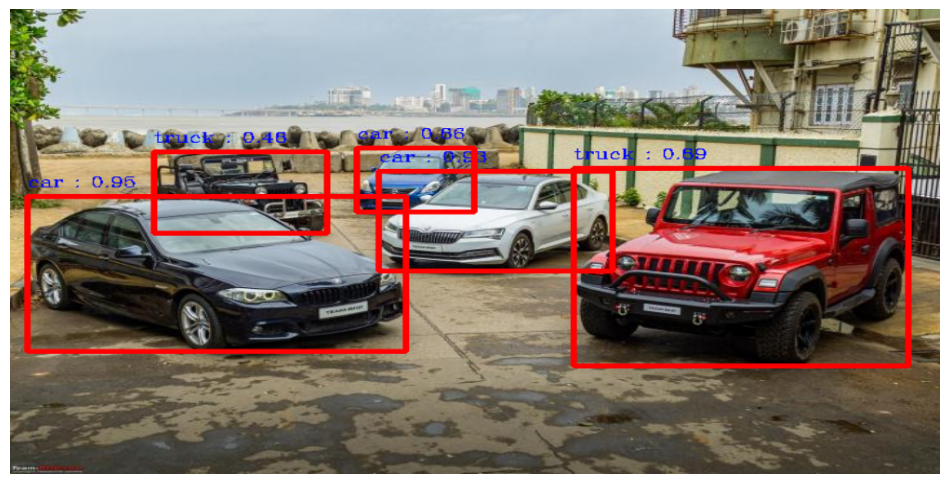

In [19]:
import cv2 as cv
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch


image = cv.imread("C:/Users/ragha/Downloads/cars.jpg")
model = YOLO('yolov8s.pt')
results = model(image)
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
model = model.to(device)

for result in results:
    for box in result.boxes:
        x1,y1 , x2 , y2 = map(int , box.xyxy[0])
        score = box.conf[0].item()
        label = result.names[int(box.cls[0])]

        cv.rectangle(image , (x1,y1) , (x2,y2) , (0,0,255) , 3)
        cv.putText(image , f'{label} : {score:.2f}' , (x1,y1-10) , cv.FONT_HERSHEY_COMPLEX , 0.5 , (255,5,0) , 1)


image = cv.resize(image , (1000,500))
cv.imshow("Result" , image)
cv.waitKey(0)
cv.destroyAllWindows()

plt.figure(figsize=(12,8))
plt.imshow(cv.cvtColor(image , cv.COLOR_BGR2RGB))

plt.axis("OFF")
plt.show()

In [33]:
import cv2 as cv
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

video =  cv.VideoCapture("C:/Users/ragha/Downloads/basketball.mp4")

model = YOLO('yolov8s.pt')
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
model = model.to(device)


frame_width = int(video.get(3))  # Width
frame_height = int(video.get(4))  # Height
fps = int(video.get(cv.CAP_PROP_FPS))  # Frames per second

# Define the output video writer
output_path = "C:/Users/ragha/Downloads/basketball yolo.mp4"
fourcc = cv.VideoWriter_fourcc(*'mp4v') 
out = cv.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while True :
    ret , frame = video.read()
    if not ret:
        break

    results = model(frame)
    for result in results:
        for box in result.boxes:
            x1,y1, x2,y2 = map(int , box.xyxy[0])
            score = box.conf[0]
            label = result.names[int(box.cls[0])]

            cv.rectangle(frame , (x1,y1) , (x2,y2) , (0,0,255) , 3)
            cv.putText(frame , f'{label} : {score:.2f}' , (x1  , y1-10) , cv.FONT_HERSHEY_COMPLEX , 1 , (0,255,0) , 2)

    out.write(frame)
    frame =  cv.resize(frame , (1000,500))
    cv.imshow("Result frame" , frame)

    if cv.waitKey(25) & 0xFF == ord('q'):
        break

video.release()
out.release()
cv.destroyAllWindows()



0: 384x640 12 persons, 1 tennis racket, 1 chair, 136.5ms
Speed: 2.1ms preprocess, 136.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 chair, 156.6ms
Speed: 2.0ms preprocess, 156.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 chair, 219.6ms
Speed: 4.6ms preprocess, 219.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 chair, 168.1ms
Speed: 4.8ms preprocess, 168.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 chair, 95.6ms
Speed: 1.3ms preprocess, 95.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 chair, 106.9ms
Speed: 1.7ms preprocess, 106.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 1 chair, 98.2ms
Speed: 1.6ms preprocess, 98.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15